In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
flights = pd.read_csv('nycflights.csv')

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


We load the data, take a look at the head, and the descriptions.

It seems that dep_time, dep_delay, arr_time, arr_delay, and air_time were all converted into floats. These are supposed to represent times where '1455' represent the time '14:55'. There should not be any decimal values. The fact that decimals are appearing means that something happened in the import that made python believe they were floating point numbers.

In [5]:
flights.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,9/30/2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,9/30/2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,9/30/2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,9/30/2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,9/30/2013 8:00


An inspection of the tail shows that there are missing values in dep_time and the other columns. Because python represents missing numeric values with NaN, they were convered to floating point numbers.

We will reload the flights csv file, this time specifying the offending columns as 'object' type. (It's a little weird, but we do not use str type because str uses NumPy's str type which is different from regular Python strings. To use Python strings, Pandas uses 'object' type)

## Loading the data again and doing a little bit of clean up

In [14]:
flights = pd.read_csv('nycflights.csv', dtype = {'dep_time':object, 
                                                 'dep_delay': object, 
                                                 'arr_time':object, 
                                                 'arr_delay':object, 
                                                 'air_time':object})

In [15]:
flights.head() # the dep_time column no longer has any decimals in it.

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,1/1/2013 5:00
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,1/1/2013 5:00
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,1/1/2013 5:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,1/1/2013 5:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,1/1/2013 6:00


In [16]:
flights.tail(10) # the missing values are still preserved

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336766,2013,9,30,2240,2250,-10,2347,7,-20,B6,2002,N281JB,JFK,BUF,52,301,22,50,9/30/2013 22:00
336767,2013,9,30,2241,2246,-5,2345,1,-16,B6,486,N346JB,JFK,ROC,47,264,22,46,9/30/2013 22:00
336768,2013,9,30,2307,2255,12,2359,2358,1,B6,718,N565JB,JFK,BOS,33,187,22,55,9/30/2013 22:00
336769,2013,9,30,2349,2359,-10,325,350,-25,B6,745,N516JB,JFK,PSE,196,1617,23,59,9/30/2013 23:00
336770,2013,9,30,NaN,1842,NaN,NaN,2019,NaN,EV,5274,N740EV,LGA,BNA,NaN,764,18,42,9/30/2013 18:00
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,9/30/2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,9/30/2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,9/30/2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,9/30/2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,9/30/2013 8:00


The next thing I notice is that the dates are split across three columns: year, month, day.

I will use Python's date functions to combine the three values into a single date value

In [17]:
flights['date'] = pd.to_datetime({'year':flights.year, 'month':flights.month, 'day':flights.day})

In [18]:
flights.head() # we have now appeneded a new column that shows the date

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,1/1/2013 5:00,2013-01-01
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,1/1/2013 5:00,2013-01-01
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,1/1/2013 5:00,2013-01-01
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,1/1/2013 5:00,2013-01-01
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,1/1/2013 6:00,2013-01-01


With the times expressed as they are, we can't calculate the real time difference between columns. The time between '600' and '545' is really only 15 minutes, but the math will make the wrong calculation of 55. Thus, we need to split our text into hour and minute and make them into date-time values.

In [19]:
# we filter the dep_time to just non_null values
# I will extract the minute values by treating the series as a string and pulling the last two characters
# we get the hour by taking everything but the last two characters
dep_min  = flights.dep_time[ flights.dep_time.notnull() ].astype(str).str[-2:  ]
dep_hour = flights.dep_time[ flights.dep_time.notnull() ].astype(str).str[  :-2]
print(dep_hour.head())
print(dep_min.head())

0    5
1    5
2    5
3    5
4    5
Name: dep_time, dtype: object
0    17
1    33
2    42
3    44
4    54
Name: dep_time, dtype: object


In [20]:
dep_date_time = pd.to_datetime({'year':flights.year, 'month':flights.month, 'day':flights.day, 
                                'hour': dep_hour, 'minute': dep_min})
print(dep_date_time.head())
print(dep_date_time.tail())

0   2013-01-01 05:17:00
1   2013-01-01 05:33:00
2   2013-01-01 05:42:00
3   2013-01-01 05:44:00
4   2013-01-01 05:54:00
dtype: datetime64[ns]
336771   NaT
336772   NaT
336773   NaT
336774   NaT
336775   NaT
dtype: datetime64[ns]


I'd like to do the same kind of conversion for all of the other time columns. 

Instead of copying and pasting the code and modifying it for each column, I'm going to build a function.

In [21]:
def convert_time(column_name):
    the_min = flights[column_name][ flights[column_name].notnull() ].astype(str).str[-2:  ]
    the_hr  = flights[column_name][ flights[column_name].notnull() ].astype(str).str[  :-2]
    date_time = pd.to_datetime({'year':flights.year, 'month':flights.month, 'day':flights.day, 
                                'hour': the_hr, 'minute': the_min})
    return date_time

In [22]:
# let's test out the function
dep_date_time = convert_time('dep_time')
print(dep_date_time.head(10))
print(dep_date_time.tail(10))

0   2013-01-01 05:17:00
1   2013-01-01 05:33:00
2   2013-01-01 05:42:00
3   2013-01-01 05:44:00
4   2013-01-01 05:54:00
5   2013-01-01 05:54:00
6   2013-01-01 05:55:00
7   2013-01-01 05:57:00
8   2013-01-01 05:57:00
9   2013-01-01 05:58:00
dtype: datetime64[ns]
336766   2013-09-30 22:40:00
336767   2013-09-30 22:41:00
336768   2013-09-30 23:07:00
336769   2013-09-30 23:49:00
336770                   NaT
336771                   NaT
336772                   NaT
336773                   NaT
336774                   NaT
336775                   NaT
dtype: datetime64[ns]


In [23]:
# seems to work!
# let's go ahead and use it:
# dep_date_time       = convert_time('dep_time')
sched_dep_date_time = convert_time('sched_dep_time')
arr_date_time       = convert_time('arr_time')
sched_arr_date_time = convert_time('sched_arr_time')

In [24]:
datetimes = pd.concat({'dep_date_time': dep_date_time,
           'sched_dep_date_time': sched_dep_date_time, 
           'arr_date_time':arr_date_time, 
           'sched_arr_date_time':sched_arr_date_time}, axis = 1)
datetimes.head()

,arr_date_time,dep_date_time,sched_arr_date_time,sched_dep_date_time
0,2013-01-01 08:30:00,2013-01-01 05:17:00,2013-01-01 08:19:00,2013-01-01 05:15:00
1,2013-01-01 08:50:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 05:29:00
2,2013-01-01 09:23:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 05:40:00
3,2013-01-01 10:04:00,2013-01-01 05:44:00,2013-01-01 10:22:00,2013-01-01 05:45:00
4,2013-01-01 08:12:00,2013-01-01 05:54:00,2013-01-01 08:37:00,2013-01-01 06:00:00


In [25]:
flights = flights.join(datetimes)  # we use the .join() function

In [26]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,date,arr_date_time,dep_date_time,sched_arr_date_time,sched_dep_date_time
0,2013,1,1,517,515,2,830,819,11,UA,...,227,1400,5,15,1/1/2013 5:00,2013-01-01,2013-01-01 08:30:00,2013-01-01 05:17:00,2013-01-01 08:19:00,2013-01-01 05:15:00
1,2013,1,1,533,529,4,850,830,20,UA,...,227,1416,5,29,1/1/2013 5:00,2013-01-01,2013-01-01 08:50:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 05:29:00
2,2013,1,1,542,540,2,923,850,33,AA,...,160,1089,5,40,1/1/2013 5:00,2013-01-01,2013-01-01 09:23:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 05:40:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,...,183,1576,5,45,1/1/2013 5:00,2013-01-01,2013-01-01 10:04:00,2013-01-01 05:44:00,2013-01-01 10:22:00,2013-01-01 05:45:00
4,2013,1,1,554,600,-6,812,837,-25,DL,...,116,762,6,0,1/1/2013 6:00,2013-01-01,2013-01-01 08:12:00,2013-01-01 05:54:00,2013-01-01 08:37:00,2013-01-01 06:00:00


Let's go ahead and drop the year, month, and day columns as we don't need them anymore.

In [27]:
flights = flights.drop(['year','month','day'], axis = 1)

If we need to get the month or day, we can extract them using the .dt. object attributes

In [28]:
flights.date.dt.month.tail()

336771    9
336772    9
336773    9
336774    9
336775    9
Name: date, dtype: int64

Now that we've got the data in and cleaned up, let's do some Basic Exploratory Analysis

## Let's start with some basics:

### How many unique carriers are there? How many flights for each carrier?

In [21]:
flights.carrier.unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [22]:
flights.carrier.nunique()

16

In [23]:
flights.carrier.value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

### What about origination airports?

In [24]:
flights.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [25]:
flights.origin.value_counts()  # it appears that the three airports in the new york area are used with similar frequency

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [26]:
# alternative method using .groupby(), which is similar to dplyr::groupby
flights.groupby('origin').sched_dep_date_time.count()

origin
EWR    120835
JFK    111279
LGA    104662
Name: sched_dep_date_time, dtype: int64

In [27]:
# if we perform a count on the dep_date_time column, it does not include NaNs.
flights.groupby('origin').dep_date_time.count()

origin
EWR    117441
JFK    108816
LGA    101383
Name: dep_date_time, dtype: int64

### Destination airports?

In [28]:
flights.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [29]:
flights.dest.nunique()  # 105 destinations

105

In [30]:
flights.dest.value_counts().head(10)  # a quick peek at the top 10 destinations

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
Name: dest, dtype: int64

### Which month is most busy?

In [31]:
flights.dep_date_time.dt.month.value_counts()

8.0     28756
10.0    28640
7.0     28322
5.0     28153
3.0     27879
4.0     27584
6.0     27099
9.0     27088
12.0    27020
11.0    27013
1.0     26443
2.0     23643
Name: dep_date_time, dtype: int64

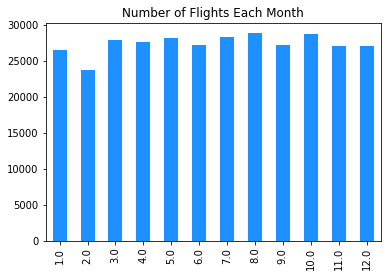

In [32]:
flights.dep_date_time.dt.month.value_counts().sort_index().plot(kind = 'bar', color = 'dodgerblue')
plt.title('Number of Flights Each Month')
plt.show()

### What time of day is most busy?

In [33]:
# using groupby instead of value_counts
flights.groupby(dep_date_time.dt.hour).date.count()

0.0        29
1.0       223
2.0        64
3.0        11
4.0       305
5.0      7246
6.0     22699
7.0     21461
8.0     26424
9.0     18871
10.0    16076
11.0    16762
12.0    16071
13.0    16890
14.0    20480
15.0    22840
16.0    22336
17.0    22144
18.0    21549
19.0    19940
20.0    16160
21.0    10960
22.0     5483
23.0     2616
Name: date, dtype: int64

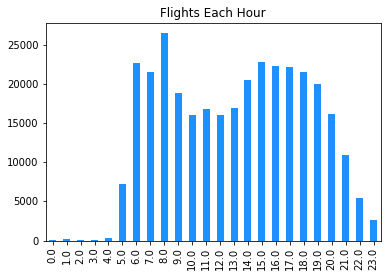

In [34]:
flights.groupby(dep_date_time.dt.hour).date.count().plot(kind = 'bar', color = 'dodgerblue')
plt.title('Flights Each Hour')
plt.show()

### Which day of the week is busiest?

In [35]:
w = flights.groupby(dep_date_time.dt.weekday).date.count()  # monday = 0, sunday = 6
w

0.0    49311
1.0    49176
2.0    48755
3.0    48487
4.0    48558
5.0    37854
6.0    45499
Name: date, dtype: int64

In [36]:
d = pd.DataFrame(w)
# rename the index with a dictionary
d.rename({0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}, axis = 'index', inplace = True)

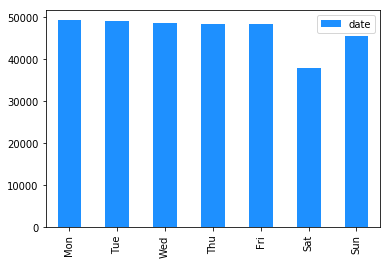

In [37]:
d.plot(kind = 'bar', color = 'dodgerblue')
plt.show()

In [38]:
flights.groupby(dep_date_time.dt.day_name('US')).date.count()  # I later learned of day_name()
# you need to specify the local so it knows the language to use

Friday       48558
Monday       49311
Saturday     37854
Sunday       45499
Thursday     48487
Tuesday      49176
Wednesday    48755
Name: date, dtype: int64

### Which carriers fly out of which airports?

In [32]:
flights.groupby(['carrier','origin']).flight.count()

carrier  origin
9E       EWR        1268
         JFK       14651
         LGA        2541
AA       EWR        3487
         JFK       13783
         LGA       15459
AS       EWR         714
B6       EWR        6557
         JFK       42076
         LGA        6002
DL       EWR        4342
         JFK       20701
         LGA       23067
EV       EWR       43939
         JFK        1408
         LGA        8826
F9       LGA         685
FL       LGA        3260
HA       JFK         342
MQ       EWR        2276
         JFK        7193
         LGA       16928
OO       EWR           6
         LGA          26
UA       EWR       46087
         JFK        4534
         LGA        8044
US       EWR        4405
         JFK        2995
         LGA       13136
VX       EWR        1566
         JFK        3596
WN       EWR        6188
         LGA        6087
YV       LGA         601
Name: flight, dtype: int64

You can make a 'pivot table' by unstacking the multi-index

In [35]:
flights.groupby(['carrier','origin']).flight.count().unstack()

origin,EWR,JFK,LGA
carrier,,,
9E,1268.0,14651.0,2541.0
AA,3487.0,13783.0,15459.0
AS,714.0,NaN,NaN
B6,6557.0,42076.0,6002.0
DL,4342.0,20701.0,23067.0
EV,43939.0,1408.0,8826.0
F9,NaN,NaN,685.0
FL,NaN,NaN,3260.0
HA,NaN,342.0,NaN


You can also make a pivot table using the pivot_table method.

In [44]:
flights.pivot_table('flight',index = 'carrier', columns = 'origin', aggfunc = 'count')

origin,EWR,JFK,LGA
carrier,,,
9E,1268.0,14651.0,2541.0
AA,3487.0,13783.0,15459.0
AS,714.0,NaN,NaN
B6,6557.0,42076.0,6002.0
DL,4342.0,20701.0,23067.0
EV,43939.0,1408.0,8826.0
F9,NaN,NaN,685.0
FL,NaN,NaN,3260.0
HA,NaN,342.0,NaN


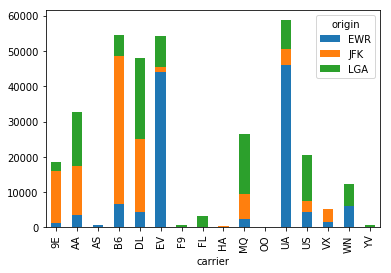

In [52]:
flights.pivot_table('flight',index = 'carrier', 
                    columns = 'origin', aggfunc = 'count').plot.bar(stacked = True)

You can see the top 4 carriers: B6, DL, EV, UA

It appears:
- B6 flies out of JFK the most.
- DL uses JFK and LGA equally
- EV uses EWR heavily
- UA uses EWR heavily as well


I'm curious to see for each of the airports, if one of the carriers will have more 'clout' because it is a bigger user of the airport.

In [64]:
ewr = flights.loc[flights.origin == 'EWR'].groupby('carrier').flight.count().sort_values(ascending = False)
ewr

carrier
UA    46087
EV    43939
B6     6557
WN     6188
US     4405
DL     4342
AA     3487
MQ     2276
VX     1566
9E     1268
AS      714
OO        6
Name: flight, dtype: int64

In [70]:
airlines = pd.read_csv('airlines.csv', index_col = 'carrier')
airlines

,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


In [75]:
airlines.join(ewr).sort_values('flight', ascending = False)

,name,flight
carrier,,
UA,United Air Lines Inc.,46087.0
EV,ExpressJet Airlines Inc.,43939.0
B6,JetBlue Airways,6557.0
WN,Southwest Airlines Co.,6188.0
US,US Airways Inc.,4405.0
DL,Delta Air Lines Inc.,4342.0
AA,American Airlines Inc.,3487.0
MQ,Envoy Air,2276.0
VX,Virgin America,1566.0


### Let's look at flights to Los Angeles

In [39]:
la = flights.loc[flights.dest.isin(['LAX','BUR','ONT','LGB'])]

In [40]:
la.dest.unique()

array(['LAX', 'LGB', 'BUR'], dtype=object)

In [41]:
la.dest.value_counts()

LAX    16174
LGB      668
BUR      371
Name: dest, dtype: int64

In [42]:
la.carrier.value_counts()

UA    5823
AA    3582
B6    2727
VX    2580
DL    2501
Name: carrier, dtype: int64

In [43]:
la.groupby('dest').carrier.value_counts()

dest  carrier
BUR   B6          371
LAX   UA         5823
      AA         3582
      VX         2580
      DL         2501
      B6         1688
LGB   B6          668
Name: carrier, dtype: int64

B6 (JetBlue) is the only carrier that goes to Burbank or Long Beach. There are no flights from Ontario to New York.

In [44]:
la.groupby('dest').origin.value_counts()

dest  origin
BUR   JFK         371
LAX   JFK       11262
      EWR        4912
LGB   JFK         668
Name: origin, dtype: int64

No direct flights from LaGuardia to Los Angeles. If you want to fly direct to Burbank or Long Beach, you must depart from JFK. 

In [45]:
la.dep_delay[la.dep_delay.notnull()].astype(int).groupby(la.dest).mean()

dest
BUR    13.475676
LAX     9.401344
LGB    11.183735
Name: dep_delay, dtype: float64